# 명령어가 추상화 되어 있음.

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets, linear_model  # 선형회귀 모델
from sklearn.metrics import mean_squared_error, r2_score  # 평가
from sklearn.model_selection import train_test_split

# 독립 변수, 종속 변수 분할
# return_X_y=True 이거 없으면 통째로 불려옴.
# feature_names로 변수 이름 loading
diabetes_X, diabetes_y = datasets.load_diabetes(return_X_y=True)
diabetes_X.shape

(442, 10)

In [4]:
# 한글 지원이 안돼서 나눔폰트 설치
import matplotlib.pyplot as plt
!apt-get update -qq
!apt-get install fonts-nanum* -qq    # 나눔폰트
import matplotlib.font_manager as fm # 아래 위치에 저장됨(나눔고딕으로 저장함)
fe = fm.FontEntry(
    fname = r'/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf', name='NanumBarunGothic')
fm.fontManager.ttflist.insert(0, fe) # fontManager에 ttf 파일 저장
# runtime Configuration
# 글자는 폰트 사이즈별로 폰트 이미지가 있어야함 -> font.family (이걸로 지정)


# plt rc 직접 지정
plt.rcParams.update({'font.size': 18, 'font.family':'NanumBarunGothic'})
plt.rc('figure', figsize =(10,10))
font_option = {'family':'NanumBarunGothic',
               'weight':'bold',
               'size':20}
plt.rc('font', **font_option)

W: Skipping acquire of configured file 'main/source/Sources' as repository 'https://r2u.stat.illinois.edu/ubuntu jammy InRelease' does not seem to provide it (sources.list entry misspelt?)
Selecting previously unselected package fonts-nanum.
(Reading database ... 124947 files and directories currently installed.)
Preparing to unpack .../fonts-nanum_20200506-1_all.deb ...
Unpacking fonts-nanum (20200506-1) ...
Selecting previously unselected package fonts-nanum-coding.
Preparing to unpack .../fonts-nanum-coding_2.5-3_all.deb ...
Unpacking fonts-nanum-coding (2.5-3) ...
Selecting previously unselected package fonts-nanum-eco.
Preparing to unpack .../fonts-nanum-eco_1.000-7_all.deb ...
Unpacking fonts-nanum-eco (1.000-7) ...
Selecting previously unselected package fonts-nanum-extra.
Preparing to unpack .../fonts-nanum-extra_20200506-1_all.deb ...
Unpacking fonts-nanum-extra (20200506-1) ...
Setting up fonts-nanum-extra (20200506-1) ...
Setting up fonts-nanum (20200506-1) ...
Setting up fo

In [2]:
print(type(diabetes_y))
np.unique(diabetes_y)  # 당뇨병 진행정도 나타냄. (회귀분석)

<class 'numpy.ndarray'>


array([ 25.,  31.,  37.,  39.,  40.,  42.,  43.,  44.,  45.,  47.,  48.,
        49.,  50.,  51.,  52.,  53.,  54.,  55.,  57.,  58.,  59.,  60.,
        61.,  63.,  64.,  65.,  66.,  67.,  68.,  69.,  70.,  71.,  72.,
        73.,  74.,  75.,  77.,  78.,  79.,  80.,  81.,  83.,  84.,  85.,
        86.,  87.,  88.,  89.,  90.,  91.,  92.,  93.,  94.,  95.,  96.,
        97.,  98.,  99., 100., 101., 102., 103., 104., 107., 108., 109.,
       110., 111., 113., 114., 115., 116., 118., 120., 121., 122., 123.,
       124., 125., 126., 127., 128., 129., 131., 132., 134., 135., 136.,
       137., 138., 139., 140., 141., 142., 143., 144., 145., 146., 147.,
       148., 150., 151., 152., 153., 154., 155., 156., 158., 160., 161.,
       162., 163., 164., 166., 167., 168., 170., 171., 172., 173., 174.,
       175., 177., 178., 179., 180., 181., 182., 183., 184., 185., 186.,
       187., 189., 190., 191., 192., 195., 196., 197., 198., 199., 200.,
       201., 202., 206., 208., 209., 210., 212., 21

### 모델로부터 기울기, 절편 구하기 -> 예측 -> 평가

In [6]:
X_train, X_test, y_train, y_test = train_test_split(diabetes_X, diabetes_y, random_state=0)
regr = linear_model.LinearRegression()  # 선형회귀

# 클래스 인스턴스
regr.fit(X_train, y_train)  # 데이터에 적합한 model을 만든다. => 기울기, 절편 구하기
diabetes_y_pred = regr.predict(X_test)
print('Coefficients: \n', regr.coef_)

# MSE
print("Mean squared error: %.2f" % mean_squared_error(y_test, diabetes_y_pred))

# 설명력 (분산을 얼마나 설명하느냐)
# r2_score(?): 범용함수
print('결정계수: %.2f' % r2_score(y_test, diabetes_y_pred))
print(regr.score(X_test, y_test))  # X_test(독립변수)을 넣어서 regr해서 나온 값을 y_test(종속변수)와 비교
print(regr.n_features_in_)

# 결과값에는 언제나 언더바를 함께 . . .

Coefficients: 
 [ -43.26198867 -208.66589855  593.40654802  302.89100542 -560.19094014
  261.40753499   -8.86674758  135.93174293  703.18354112   28.34977176]
Mean squared error: 3180.16
결정계수: 0.36
0.35940880381777085
10


In [7]:
from sklearn.datasets import load_diabetes

data = load_diabetes()
print(data.target[:10])
print(data.feature_names)

[151.  75. 141. 206. 135.  97. 138.  63. 110. 310.]
['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6']


In [8]:
from sklearn.linear_model import Lasso
import pandas as pd
data = load_diabetes()  # Bunch 형으로 로딩

X = data.data
y = data.target

# np.c_ 컬럼으로 묶을 때
df = pd.DataFrame(data = np.c_[X, y], columns = data.feature_names + ['target'])

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

alpha = 1.0

# 중요한 hyper parameter: 사람이 결정해야 될 변수
# 규제를 약하게 하면.. 과적합 발생!
# warm_start: 여러 번 학습할 때 초기화 여부

lasso = Lasso(alpha = alpha)  # L1 규제 (계수의 절대값의 합)
        # 변수가 0이 되어서 변수 선택으로 작동
lasso.fit(X_train, y_train)
y_pred = lasso.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print(f"(MSE): {mse: .2f}")

(MSE):  3403.58


In [10]:
!pip install ace_tools_open

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 20.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 38.2 MB/s eta 0:00:00


In [11]:
coefficients = pd.DataFrame({'Feature': [f'X{i}' for i in range(len(lasso.coef_))], 'Coefficient': lasso.coef_})
import ace_tools_open as tools
tools.display_dataframe_to_user(name = '회귀계수', dataframe = coefficients)

회귀계수


### 비선형 회귀
 - scikit-learn에서는 비선형시 데이터 자체를 변형

In [13]:
x = np.array([0.0, 1.0, 2.0, 3.0, 4.0, 5.0])
y = np.array([0.0, 0.8, 0.9, 0.1, -0.8, -1.0])
z = np.polyfit(x, y, 3)  # 3차 방정식
z

array([ 0.08703704, -0.81349206,  1.69312169, -0.03968254])

In [14]:
from sklearn.preprocessing import PolynomialFeatures
X = np.arange(6).reshape(3, 2)
print(X)

poly = PolynomialFeatures(2)  # 데이터 자체를 변형
# [1, a, b, a^2, ab, b^2].
poly.fit_transform(X)  # 전처리 fit -> transform
                       # 모델 fit -> predict

[[0 1]
 [2 3]
 [4 5]]


array([[ 1.,  0.,  1.,  0.,  0.,  1.],
       [ 1.,  2.,  3.,  4.,  6.,  9.],
       [ 1.,  4.,  5., 16., 20., 25.]])

In [16]:
from sklearn.linear_model import Ridge
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

def f(x):
  return x * np.sin(x)  # 진폭을 결정, 주기 결정

In [17]:
x_plot = np.linspace(0, 10, 100)
x = np.linspace(0, 10, 100)  # 0.1
rng = np.random.RandomState(0)
rng.shuffle(x)
x = np.sort(x[:20])
y = f(x)

Ridge = >

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from font(s) NanumBarunGothic.
  fig.canvas.print_figure(bytes_io, **kw)


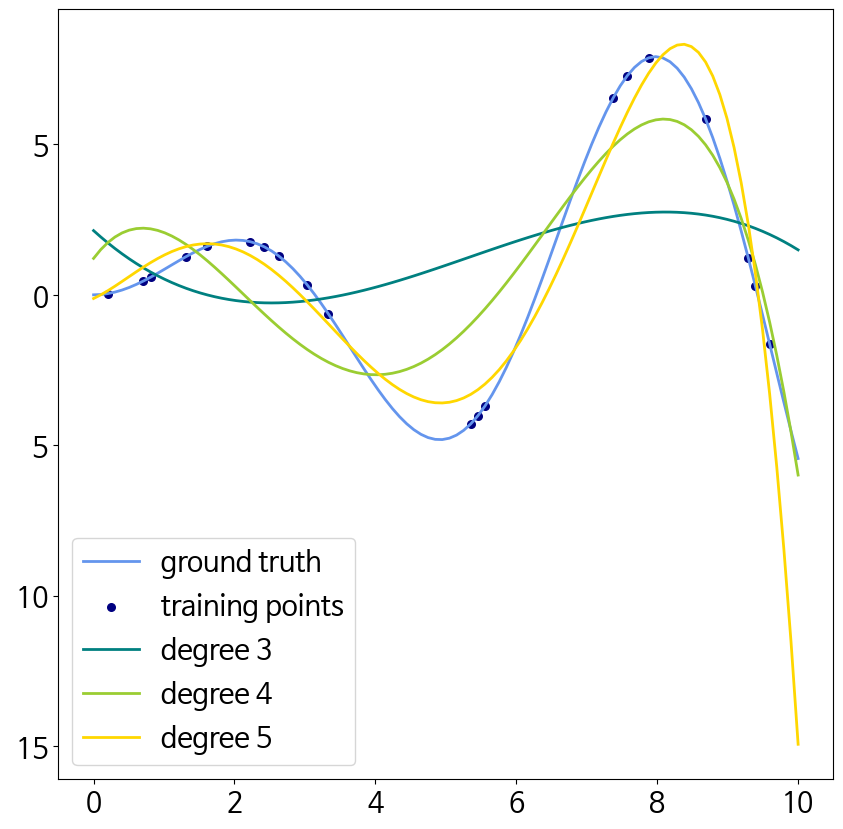

In [18]:
X = x[:, np.newaxis]
X_plot = x_plot[:, np.newaxis]
colors = ['teal', 'yellowgreen', 'gold']

lw = 2
plt.plot(x_plot, f(x_plot), color = 'cornflowerblue', linewidth = lw, label = 'ground truth')
plt.scatter(x, y, color = 'navy', s = 30, marker = 'o', label = 'training points')

for count, degree in enumerate([3, 4, 5]):  # 방정식의 차수

  # pipeline도 모델인데, 앞에 전처리가 붙어 있는 것임.
  model = make_pipeline(PolynomialFeatures(degree), Ridge())
  model.fit(X, y)
  y_plot = model.predict(X_plot)
  plt.plot(x_plot, y_plot, color = colors[count], linewidth = lw, label = "degree %d" % degree)

plt.legend(loc = 'lower left')

plt.show()

### 문제1

In [20]:
# 아래의 데이터를 이용해서 LinearRegression을 실시하시오.

X = [[0, 0], [1, 1], [2, 2]]
y = [0, 1, 2]


In [21]:
X = np.array([[0, 0], [1, 1], [2, 2]])
y = np.array([0, 1, 2])
y = y[:, np.newaxis]

In [22]:
reg = linear_model.LinearRegression()
reg.fit(X, y)
reg.coef_

array([[0.5, 0.5]])

In [23]:
reg.intercept_

array([1.11022302e-16])

### 문제 1-1

In [24]:
# 두 가지 정보로 휘귀식을 만들어 보시오.
x1 = 0
x2 = 0
y = reg.coef_[0][0] * x1 +reg.coef_[0][1] * x2 + reg.intercept_
y

array([1.11022302e-16])

In [25]:
from sklearn.datasets import fetch_california_housing
import matplotlib.pyplot as plt
import pandas as pd
california = fetch_california_housing()
type(california)

sklearn.utils._bunch.Bunch

### 문제 2

In [27]:
california.feature_names

# 데이터 프레임으로 생성하시오.
dfX = pd.DataFrame(california.data, columns=california.feature_names)
dfy = pd.DataFrame(california.target, columns=['price'])
print(dfX.head())

dfy.head()

   MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0  8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
1  8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
2  7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   
3  5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85   
4  3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85   

   Longitude  
0    -122.23  
1    -122.22  
2    -122.24  
3    -122.25  
4    -122.25  


,price
0,4.526
1,3.585
2,3.521
3,3.413
4,3.422


In [28]:
dfX.shape

(20640, 8)

In [29]:
from sklearn.linear_model import LinearRegression
model_california = LinearRegression().fit(
    california.data, california.target  # 개별 데이터는 ndarray
)

### DataFrame

In [30]:
model_california = LinearRegression().fit(
    dfX, dfy
)

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


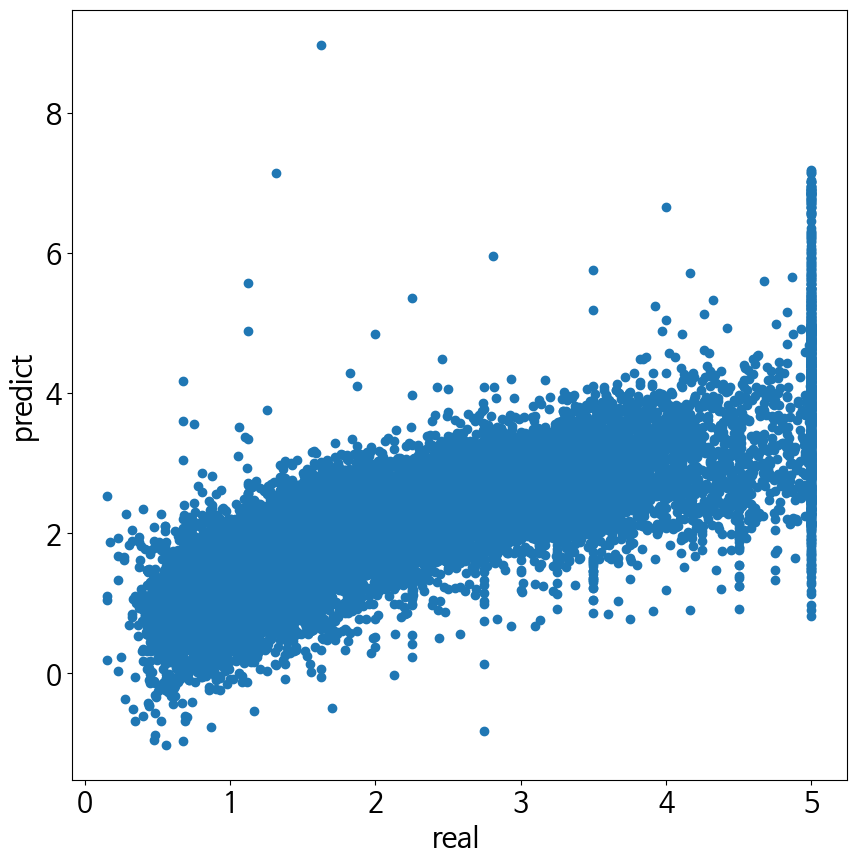

In [31]:
predictions = model_california.predict(california.data)
plt.scatter(california.target, predictions)
plt.xlabel(u"real ")
plt.ylabel(u"predict ")

plt.show()

### 문제 3

In [33]:
# MSE를 출력하시오.
mean_squared_error(dfy, predictions)
print(model_california.score(california.data, dfy))  # 모델이기 때문에 예측하고 비교

0.606232685199805


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


### 전처리
 - 함수와 클래스로 지원

In [34]:
# 함수 사용
from sklearn.preprocessing import scale, robust_scale, minmax_scale, maxabs_scale
print(np.arange(10, dtype = np.float64) -3 )

x = (np.arange(1000, dtype = np.float64) - 500).reshape(-1, 1)
print(x.shape)

# 인스턴스 과정이 없음: 함수
df = pd.DataFrame(np.hstack([x, scale(x), robust_scale(x), minmax_scale(x), maxabs_scale(x)]),  # -1 ~ 1
                  columns = ["x", "scale(x)", "robust_scale(x)", "minmax_sclae(x)", "maxabs_scale(x)"])

print(df.head())

[-3. -2. -1.  0.  1.  2.  3.  4.  5.  6.]
(1000, 1)
       x  scale(x)  robust_scale(x)  minmax_sclae(x)  maxabs_scale(x)
0 -500.0 -1.730320        -1.000000         0.000000           -1.000
1 -499.0 -1.726856        -0.997998         0.001001           -0.998
2 -498.0 -1.723391        -0.995996         0.002002           -0.996
3 -497.0 -1.719927        -0.993994         0.003003           -0.994
4 -496.0 -1.716463        -0.991992         0.004004           -0.992


### # 값의 분포 차이 확인

<class 'sklearn.utils._bunch.Bunch'>
(150, 4)
전처리 전 평균:  [5.84333333 3.05733333 3.758      1.19933333]
전처리 전 std:  [0.82530129 0.43441097 1.75940407 0.75969263]
전처리 후 평균:  [-1.69031455e-15 -1.84297022e-15 -1.69864123e-15 -1.40924309e-15]
전처리 후 std:  [1. 1. 1. 1.]


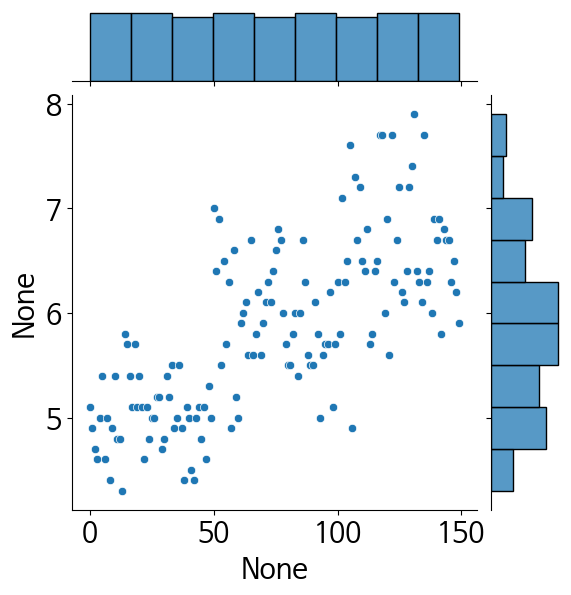

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from font(s) NanumBarunGothic.
  fig.canvas.print_figure(bytes_io, **kw)


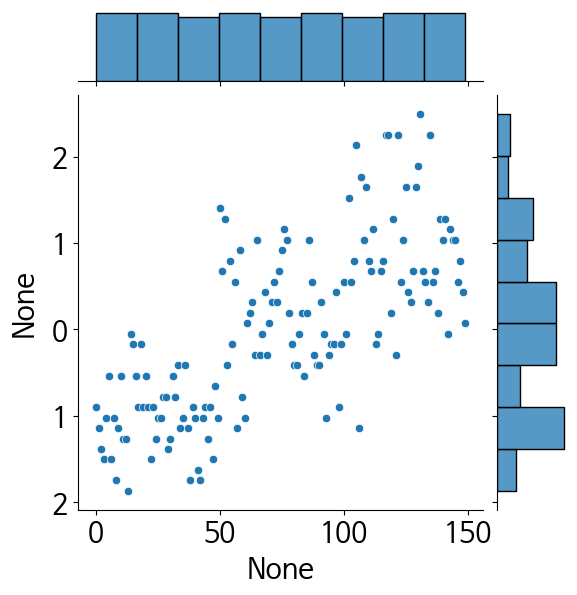

In [35]:
import seaborn as sns
from sklearn.datasets import load_iris

iris = load_iris()
print(type(iris))

data1 = iris.data
print(data1.shape)

data2 = scale(iris.data)
print("전처리 전 평균: ", np.mean(data1, axis = 0))
print("전처리 전 std: ", np.std(data1, axis = 0))
print("전처리 후 평균: ", np.mean(data2, axis = 0))
print("전처리 후 std: ", np.std(data2, axis = 0))

sns.jointplot(data1[:, 0])
plt.show()

sns.jointplot(data2[:, 0])
plt.show()

In [36]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()  # 인스턴스
scaler.fit(data1)
data2 = scaler.transform(data1)
print(data1.std(), data2.std())
data3 = scaler.fit_transform(data1)
print(data3.std())

1.9738430577598278 1.0
1.0


In [37]:
data_scale = (data1 - data1.mean()) / data1.std()

In [38]:
data_scale * data1.std() + data1.std()

array([[ 3.60934306,  2.00934306, -0.09065694, -1.29065694],
       [ 3.40934306,  1.50934306, -0.09065694, -1.29065694],
       [ 3.20934306,  1.70934306, -0.19065694, -1.29065694],
       [ 3.10934306,  1.60934306,  0.00934306, -1.29065694],
       [ 3.50934306,  2.10934306, -0.09065694, -1.29065694],
       [ 3.90934306,  2.40934306,  0.20934306, -1.09065694],
       [ 3.10934306,  1.90934306, -0.09065694, -1.19065694],
       [ 3.50934306,  1.90934306,  0.00934306, -1.29065694],
       [ 2.90934306,  1.40934306, -0.09065694, -1.29065694],
       [ 3.40934306,  1.60934306,  0.00934306, -1.39065694],
       [ 3.90934306,  2.20934306,  0.00934306, -1.29065694],
       [ 3.30934306,  1.90934306,  0.10934306, -1.29065694],
       [ 3.30934306,  1.50934306, -0.09065694, -1.39065694],
       [ 2.80934306,  1.50934306, -0.39065694, -1.39065694],
       [ 4.30934306,  2.50934306, -0.29065694, -1.29065694],
       [ 4.20934306,  2.90934306,  0.00934306, -1.09065694],
       [ 3.90934306,  2.

In [43]:
#scale.inverse_transform(data1).std()

In [42]:
from sklearn.preprocessing import StandardScaler

# Create a StandardScaler instance
scaler = StandardScaler()

# Fit the scaler to your data and transform it
data2 = scaler.fit_transform(data1)

# Now you can use inverse_transform on the scaler object
data_original = scaler.inverse_transform(data2)

# Calculate the standard deviation of the inversed data
std_original = data_original.std()

print(std_original)

1.9738430577598278


### vector = 크기와 방향 / 크기

In [41]:
from sklearn import preprocessing
X = [[1., -1., 2.],
     [2., 0., 0.],
     [0., 1., -1.]]
     # L1, L2, max

X_normalized = preprocessing.normalize(X, norm = 'l2')
X_normalized

array([[ 0.40824829, -0.40824829,  0.81649658],
       [ 1.        ,  0.        ,  0.        ],
       [ 0.        ,  0.70710678, -0.70710678]])

In [44]:
normalizer = preprocessing.Normalizer().fit(X)
normalizer.transform(X)

array([[ 0.40824829, -0.40824829,  0.81649658],
       [ 1.        ,  0.        ,  0.        ],
       [ 0.        ,  0.70710678, -0.70710678]])

### 결측치 처리

In [45]:
from sklearn.impute import SimpleImputer

# constant, mean, median(지금은 데이터 많이 없어보여서 못 함), most_frequency(최빈수)
imp_mean = SimpleImputer(missing_values= np.nan, strategy = 'constant')   # mean 쓸 수도 있음.
imp_mean.fit([[7, 2, 3], [4, np.nan, 6], [10, 5, 9]])
X = [[np.nan, 2, 3], [4, np.nan, 6], [10, np.nan, 9]]
print(X)
print(imp_mean.transform(X))

[[nan, 2, 3], [4, nan, 6], [10, nan, 9]]
[[ 0.  2.  3.]
 [ 4.  0.  6.]
 [10.  0.  9.]]


In [46]:
from sklearn.impute import KNNImputer

#   [[1. , 2. , np.nan ],
#   [3. , 4. , 3. ],
#   [np.nan, 6. , 5. ],  # 근접한 거리는 유클리디안거리 (피타고라스 정리)
#   [8. , 8. , 7. ]]

X = [[1, 2, np.nan], [3, 4, 3], [np.nan, 6, 5], [8, 8, 7]]
imputer = KNNImputer(n_neighbors=2)  # n_neighbors=2 이런 사람이 정하는 건 다 하이퍼파라미터임.
imputer.fit_transform(X)

array([[1. , 2. , 4. ],
       [3. , 4. , 3. ],
       [5.5, 6. , 5. ],
       [8. , 8. , 7. ]])

In [47]:
np.sqrt((6-4)**2 + (5-3)**2)
np.sqrt((6-8)**2 + (5-7)**2)

2.8284271247461903

In [48]:
from scipy.spatial import distance

a = np.array([1, 0, 0, 0, 1, 1, 1])
b = np.array([0, 0, 1, 0, 0, 1, 0])
print(distance.euclidean(a, b))

2.0


### 범주화

In [49]:
from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder()
X = np.array([[2], [3], [4], [2], [4]])
ohe.fit(X)
ohe.categories_

[array([2, 3, 4])]

In [50]:
print(ohe.transform(X))
# 순서와 인덱스로 표현 -> 저장공간 낭비 안 함.

  (0, 0)	1.0
  (1, 1)	1.0
  (2, 2)	1.0
  (3, 0)	1.0
  (4, 2)	1.0


In [51]:
# 희소행렬
print(ohe.transform(X).toarray())

[[1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]
 [1. 0. 0.]
 [0. 0. 1.]]


In [52]:
# 인간이 무슨 말인지 알아듣지 못하기 때문에 inverse_transform 취해줌.
ohe.inverse_transform([[0., 0., 1.]])

array([[4]])

### 자동 정렬
 - 대전, 부산, 서울 순으로 만들어짐
  - 이때, 서울은 0 0 1 / 대전은 1 0 0

In [53]:
ohe.fit([["서울"], ["서울"], ["대전"], ["부산"]])
ohe.transform([["서울"], ["대전"]]).toarray()

array([[0., 0., 1.],
       [1., 0., 0.]])

In [54]:
ohe = OneHotEncoder()
X = np.array([[0, 0, 4], [1, 1, 0], [0, 2, 1], [1, 0, 2], [1, 1, 3]])
ohe.fit(X)
ohe.categories_

[array([0, 1]), array([0, 1, 2]), array([0, 1, 2, 3, 4])]

In [55]:
# 원핫인코딩
ohe.transform(X).toarray()

array([[1., 0., 1., 0., 0., 0., 0., 0., 0., 1.],
       [0., 1., 0., 1., 0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 1., 0., 1., 0., 0., 0.],
       [0., 1., 1., 0., 0., 0., 0., 1., 0., 0.],
       [0., 1., 0., 1., 0., 0., 0., 0., 1., 0.]])

In [56]:
ohe.inverse_transform([[1., 0., 1., 0., 0., 0., 0., 0., 0., 1.]])

array([[0, 0, 4]])

In [57]:
# 문자를 숫자로 변형할 때 사용 (encoding)

# 문자 -> 인덱스 -> 인덱스 -> 문자
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
le.fit([1, 2, 2, 6, 4])  # 단어의 종류
le.classes_

#        0  1  2  3
# array([1, 2, 4, 6])

array([1, 2, 4, 6])

In [58]:
# 인덱스로 매핑
le.transform([1, 1, 2, 6])

array([0, 0, 1, 3])

In [59]:
le.inverse_transform([0, 0, 1, 3])

array([1, 1, 2, 6])

### 텍스트 마이닝에서 단어의 숫자 카운트

In [60]:
# 텍스트에서 특징 추출 -> 인덱스 표현
# 카운트
from sklearn.feature_extraction import DictVectorizer
v = DictVectorizer(sparse = False)
D = [{"foo": 1, "bar": 2}, {"foo": 3, "baz": 1}]
X = v.fit_transform(D)
X

# 문자
# ['bar', 'baz', 'foo']  Dictionary 생성
# [2., 0., 1.]
# [ 0, 1,  3 ]

array([[2., 0., 1.],
       [0., 1., 3.]])

In [61]:
v.feature_names_

['bar', 'baz', 'foo']

In [62]:
from pandas import DataFrame, Series
from itertools import cycle
area = '서울 부산 대구 인천 광주 대전 울산 세종 경기 강원 충북 충남 전북 전남 경북 경남 제주'.split()
college = '인문대학 사회과학대학 자연과학대학 간호대학 경영대학 공과대학 미술대학'.split()
gender = '남성 여성'.split()
fake_data = zip(range(100), cycle(area), cycle(college), cycle(gender))
hundred_students = DataFrame([data for num, *data in fake_data],
                              columns='지역 단과대 성별'.split())
hundred_students.head(10)

,지역,단과대,성별
0,서울,인문대학,남성
1,부산,사회과학대학,여성
2,대구,자연과학대학,남성
3,인천,간호대학,여성
4,광주,경영대학,남성
5,대전,공과대학,여성
6,울산,미술대학,남성
7,세종,인문대학,여성
8,경기,사회과학대학,남성
9,강원,자연과학대학,여성


In [63]:
college_one_hot_encoded = pd.get_dummies(hundred_students.단과대)
college_one_hot_encoded

,간호대학,경영대학,공과대학,미술대학,사회과학대학,인문대학,자연과학대학
0,False,False,False,False,False,True,False
1,False,False,False,False,True,False,False
2,False,False,False,False,False,False,True
3,True,False,False,False,False,False,False
4,False,True,False,False,False,False,False
...,...,...,...,...,...,...,...
95,False,True,False,False,False,False,False
96,False,False,True,False,False,False,False
97,False,False,False,True,False,False,False
98,False,False,False,False,False,True,False


In [64]:
college_one_hot_encoded.columns

Index(['간호대학', '경영대학', '공과대학', '미술대학', '사회과학대학', '인문대학', '자연과학대학'], dtype='object')

In [65]:
# 회귀 분석, ANN -> 범주형 변수를 원핫인코딩해주어야 한다.
# 26 = 17 + 7 + 2
all = pd.get_dummies(hundred_students, prefix = ['지역', '단과대', '성별']).head()
all.columns

Index(['지역_강원', '지역_경기', '지역_경남', '지역_경북', '지역_광주', '지역_대구', '지역_대전', '지역_부산',
       '지역_서울', '지역_세종', '지역_울산', '지역_인천', '지역_전남', '지역_전북', '지역_제주', '지역_충남',
       '지역_충북', '단과대_간호대학', '단과대_경영대학', '단과대_공과대학', '단과대_미술대학', '단과대_사회과학대학',
       '단과대_인문대학', '단과대_자연과학대학', '성별_남성', '성별_여성'],
      dtype='object')